In [1]:
import numpy as np
import pandas as pd
import gc
from multiprocessing import Pool
import yt
from yt import YTArray
import cmasher as cmr
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=Warning) 
from mpl_toolkits.axes_grid1 import make_axes_locatable

/home/bego/anaconda3/lib/python3.8/site-packages/yt/utilities/logger.py:4: VisibleDeprecationWarning: The configuration file /home/bego/.config/yt/ytrc is deprecated in favor of /home/bego/.config/yt/yt.toml. Currently, both are present. Please manually remove the deprecated one to silence this warning.
Deprecated since v4.0.0. This feature will be removed in v4.1.0
  from yt.config import ytcfg


In [2]:
path_csv = "/media/temp/bego/snapshots_resim/"
path_datos = "/home/bego/GARROTXA_copia/datos_GARROTXA_resim/"
path_results = "/home/bego/GARROTXA/GalaDyn/results/"
path_crossmatch = "/home/bego/GARROTXA/satelites_crossmatch/"
path_figures_acceleration = "/home/bego/GARROTXA/aceleration_figures/"
path_figures = "/home/bego/GARROTXA/acceleration_figures/"
path_acceleration = "/home/bego/GARROTXA/acceleration/"
path_disk = "/home/bego/GARROTXA/disco/"
seconds_to_Myr = 3.15576e+16
datos_edades =  pd.read_csv(path_datos + "edades.csv", sep = ",",index_col = 0)

In [3]:
def process_data_to_plot(data, modo, nbins=22):
    if modo ==0:
        print("Mode 0!")
        arr_z = np.array(data[f"amp{modo}"])
    else:
        arr_z = np.array(data[f"amp{modo}"]/data["Nparticles"])
   # arr_z = np.array(data[f"amp{modo}"])
    amp = arr_z.reshape(-1, nbins)
    arr_z = np.array(data[f"phase{modo}"])
    phase = arr_z.reshape(-1, nbins)
    return data["lookbacktime"][::nbins], data["Rcenters"][0:nbins],np.log10(amp.T), phase.T

In [14]:


def process_data_to_plot(data, modo, nbins=22):
    if modo ==0:
        print("Mode 0!")
        arr_z = np.array(data[f"amp{modo}"])
    else:
        arr_z = np.array(data[f"amp{modo}"]/data["Nparticles"])
   # arr_z = np.array(data[f"amp{modo}"])
    amp = arr_z.reshape(-1, nbins)
    arr_z = np.array(data[f"phase{modo}"])
    phase = arr_z.reshape(-1, nbins)
    return data["lookbacktime"][::nbins], data["Rcenters"][0:nbins],np.log10(amp.T), phase.T


    
def plot_fourierogram(data, etiqueta, vmin, vmax, nbins, data_mode ):
    fig, ax = plt.subplots(nrows=2,ncols =3 , sharex = True,sharey = True,  figsize=(20,5))
    lookback, rcenters, amplitude, phase = process_data_to_plot(data,modo=1, nbins=nbins)
    if data_mode == "acceleration":
        im0 = ax[0,0].pcolormesh(lookback,rcenters,np.log10(amplitude*seconds_to_Myr), vmin = vmin, vmax =vmax, cmap = "inferno")
    elif data_mode == "disk":
        im0 = ax[0,0].pcolormesh(lookback,rcenters,amplitude, vmin = vmin, vmax =vmax, cmap = "inferno")
    im1 = ax[1,0].pcolormesh(lookback, rcenters,phase, vmin = -np.pi,vmax = np.pi, cmap = "twilight")
    ax[0,0].set_title(f"{etiqueta} $m=1$")
    lookback, rcenters, amplitude, phase = process_data_to_plot(data,modo=2, nbins=nbins)
    if data_mode == "acceleration":
        im00 = ax[0,1].pcolormesh(lookback,rcenters,np.log10(amplitude*seconds_to_Myr), vmin = vmin, vmax = vmax, cmap = "inferno")
        plt.ylim(2,40)
    elif data_mode == "disk":
        im00 = ax[0,1].pcolormesh(lookback,rcenters,amplitude, vmin = vmin, vmax = vmax, cmap = "inferno")
        plt.ylim(2,22)
    #im00 = ax[0,1].pcolormesh(lookback,rcenters,amplitude, vmin = vmin, vmax = vmax, cmap = "inferno")
    im11 = ax[1,1].pcolormesh(lookback, rcenters,phase, vmin = -np.pi,vmax = np.pi, cmap = "twilight")
    ax[0,1].set_title(f"{etiqueta} $m=2$")

    lookback, rcenters, amplitude, phase = process_data_to_plot(data,modo=3, nbins=nbins)
    if data_mode == "acceleration":
        im00 = ax[0,2].pcolormesh(lookback,rcenters,np.log10(amplitude*seconds_to_Myr), vmin = vmin, vmax = vmax, cmap = "inferno")
        plt.ylim(2,40)
    elif data_mode == "disk":
        im00 = ax[0,2].pcolormesh(lookback,rcenters,amplitude, vmin = vmin, vmax = vmax, cmap = "inferno")
        plt.ylim(2,22)
    #im00 = ax[0,1].pcolormesh(lookback,rcenters,amplitude, vmin = vmin, vmax = vmax, cmap = "inferno")
    im11 = ax[1,2].pcolormesh(lookback, rcenters,phase, vmin = -np.pi,vmax = np.pi, cmap = "twilight")
    ax[0,2].set_title(f"{etiqueta} $m=3$")
    
    
    
    
    plt.xlim(6.3,0)
    
    
    plt.subplots_adjust(left=0 ,bottom= 0.03, right=0.9, top=0.95, wspace=0.02, hspace= 0.13)

    fig.colorbar(im0, ax=ax[0], label = "log $A_{m}$",aspect=15,pad = 0.01)
    fig.colorbar(im1, ax=ax[1], label= "$\phi_{max}$",aspect=15,pad = 0.01)


    ax[1,1].set_xlabel("Lookback time [Gyr]", fontsize = 12)
    ax[1,0].set_xlabel("Lookback time [Gyr]", fontsize = 12)
    ax[1,2].set_xlabel("Lookback time [Gyr]", fontsize = 12)
    ax[0,0].set_ylabel("R [kpc]", fontsize = 12)
    ax[1,0].set_ylabel("R [kpc]", fontsize = 12)
    #lt.show()
   # plt.savefig(path_results +f"{etiqueta}_fourier.png", dpi = 100, bbox_inches='tight', facecolor = "white" )
#    plt.shoW()
        #fig, ax = plt.subplots(nrows=2,ncols =3 , sharex = True,sharey = True,  figsize=(20,5))

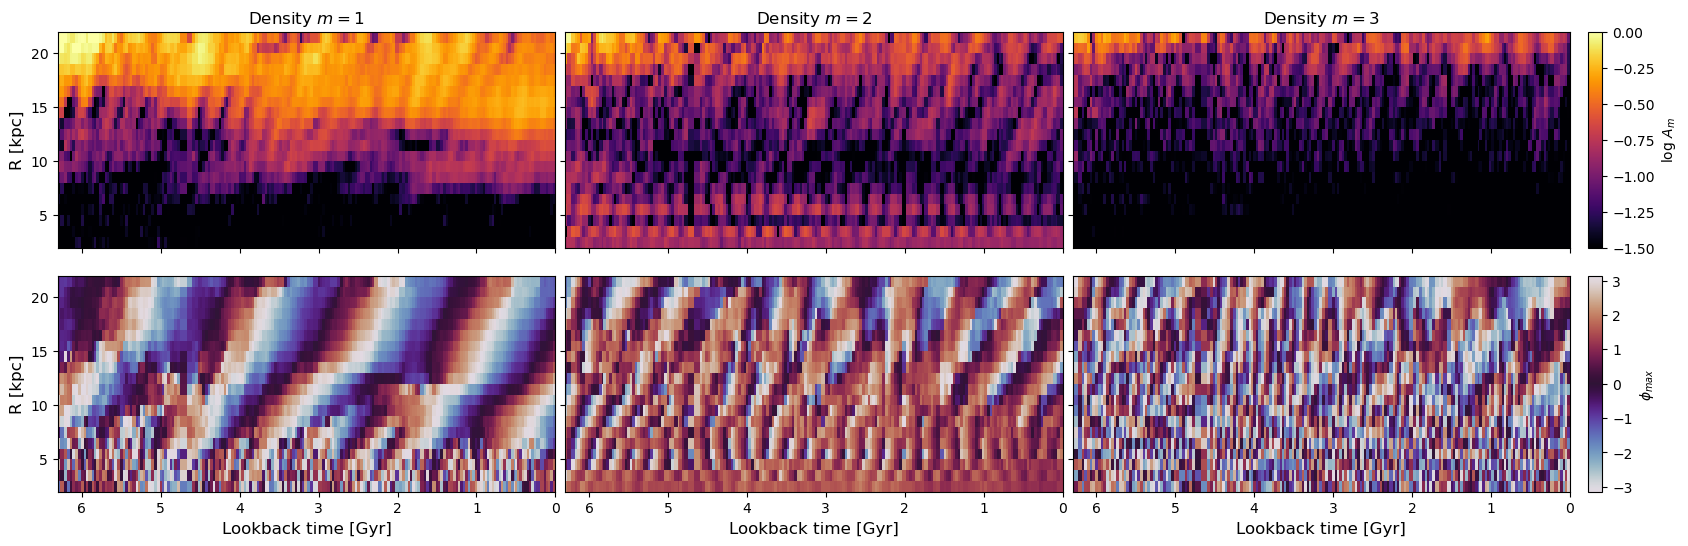

In [13]:
density = pd.read_csv(path_results + f"disc/fourier_22_None_disc_a2.csv", sep = ",")
plot_fourierogram(density, etiqueta="Density",vmin = -1.5, vmax = 0., nbins=22, data_mode = "disk")

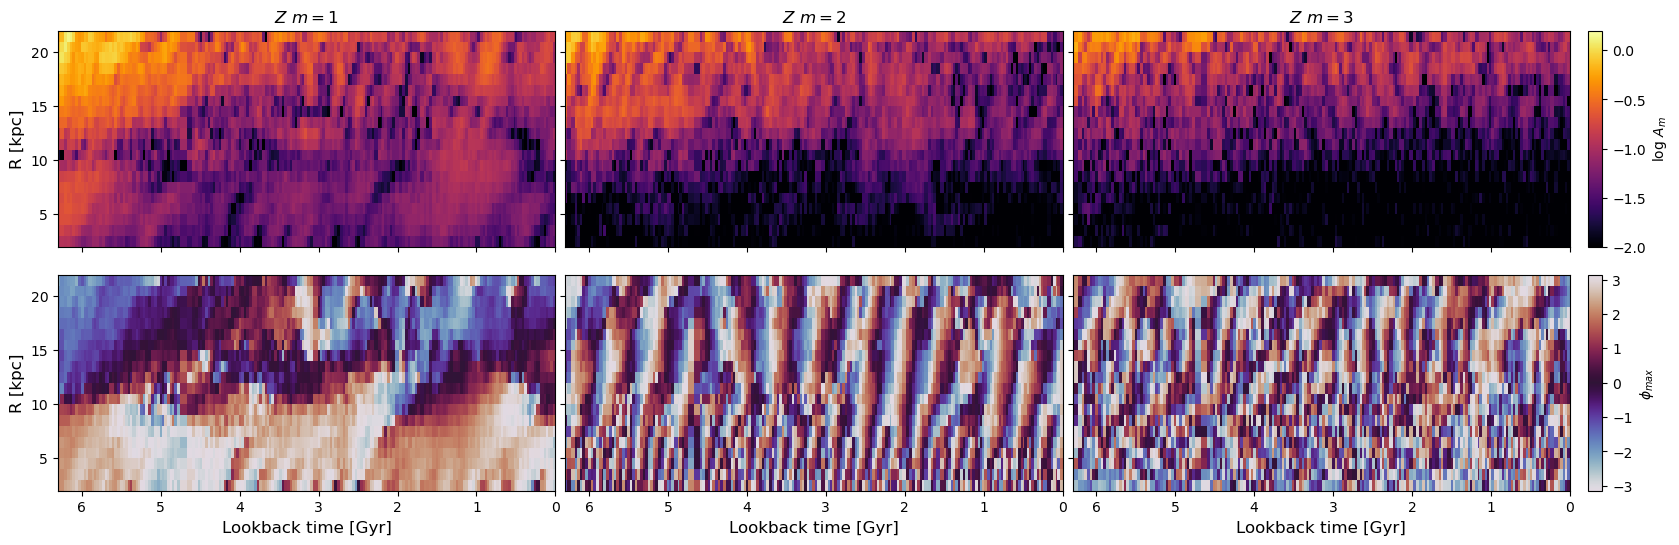

In [16]:
z = pd.read_csv(path_results + f"disc/fourier_22_Z_disc_a2.csv", sep = ",")
plot_fourierogram(z,etiqueta="$Z$",vmin = -2, vmax = 0.2, nbins=22, data_mode = "disk")

In [ ]:
vz = pd.read_csv(path_results + f"disc/fourier_22_disc_a2.csv", sep = ",")
plot_fourierogram(vz, etiqueta="$V_{Z}$",vmin = -0.3, vmax = 1.5,  nbins=22,data_mode = "disk")

In [ ]:
B = pd.read_csv(path_results + f"disc/fourier_22_bending_.csv", sep = ",")
plot_fourierogram(B, etiqueta="Bending",vmin = -0.1,vmax= 1.4, nbins=22, data_mode = "disk")

In [ ]:
A = pd.read_csv(path_results + f"disc/fourier_22_breathing_.csv", sep = ",")
plot_fourierogram(A, etiqueta="Breathing",vmin = -0.3,vmax= 1.3, nbins=22, data_mode = "disk")

In [ ]:
#z = pd.read_csv(path_results + f"disc/fourier_22_Z_disc_a2.csv", sep = ",")
#vz = pd.read_csv(path_results + f"disc/fourier_22_disc_a2.csv", sep = ",")
#A = pd.read_csv(path_results + f"disc/fourier_22_breathing_.csv", sep = ",")
#B = pd.read_csv(path_results + f"disc/fourier_22_bending_.csv", sep = ",")
#plot_fourierogram(vz, etiqueta="$V_{Z}$",vmin = -0.3, vmax = 1.5,  nbins=22,data_mode = "disk")
#plot_fourierogram(density, etiqueta="Density",vmin = -1.5, vmax = 0., nbins=22, data_mode = "disk")
#plot_fourierogram(B, etiqueta="Bending",vmin = -0.1,vmax= 1.4, nbins=22, data_mode = "disk")
#plot_fourierogram(A, etiqueta="Breathing",vmin = -0.3,vmax= 1.3, nbins=22, data_mode = "disk")